### Code from Machine Learning with Signal Processing Techniques 
* GEPLAATST APRIL 4, 2018 ATASPINAR
* https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/

In [7]:
%matplotlib widget
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

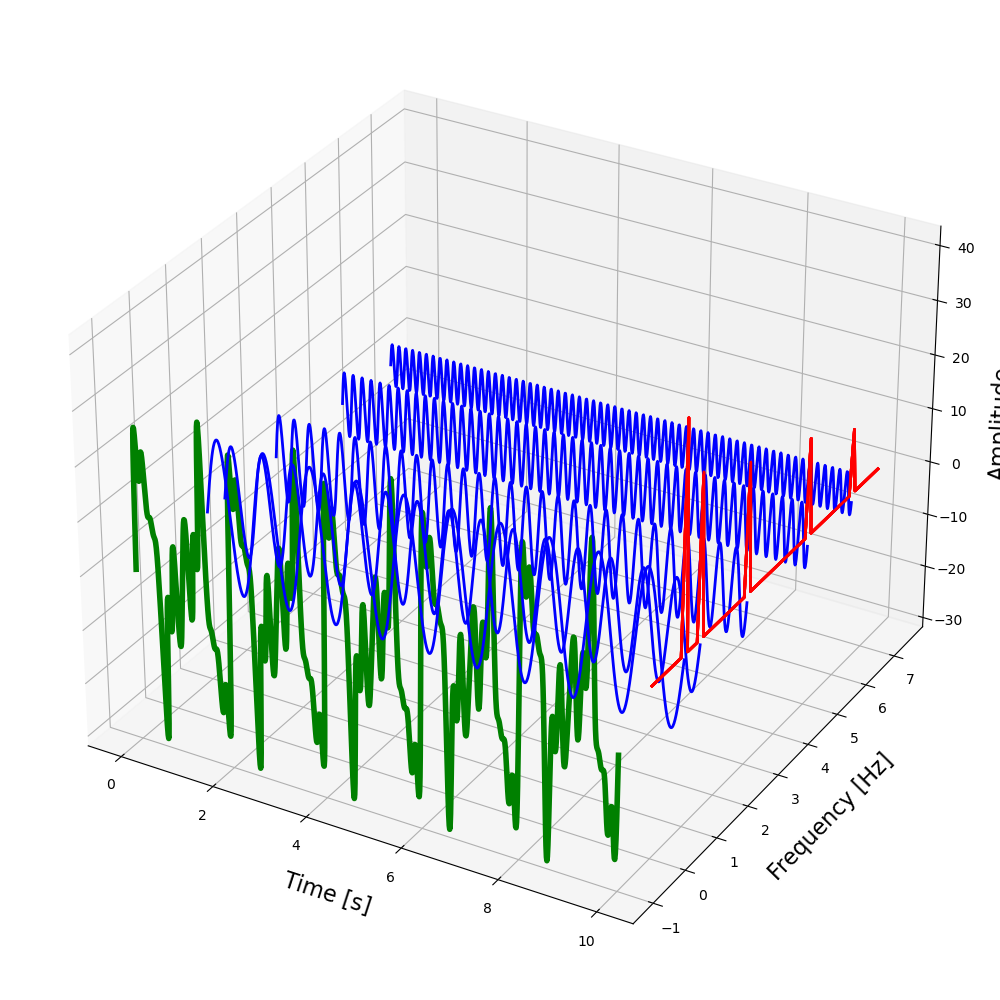

In [26]:
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0, t_n, N, endpoint=False)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

colors = ['g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)
ax.set_yticks([-1,0,1,2,3,4,5,6,7])

y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [-1] + [1, 1.5, 3, 5, 6.5]  # add freq for composite values

for ii in range(0,len(y_values_)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000)
    y=np.array([frequencies[ii]]*length)
    z=signal

    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(x, y, zs=z, linewidth=linewidth, color=color)

    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(x, y, zs=z, linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()

In [ ]:

t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()